In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score
import random

## Load data

In [2]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

In [3]:
# 550 data with 300 features
print(x_train.shape)

(550, 300)


In [4]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


## Question 1
K-fold data partition: Implement the K-fold cross-validation function. Your function should take K as an argument and return a list of lists (len(list) should equal to K), which contains K elements. Each element is a list contains two parts, the first part contains the index of all training folds, e.g. Fold 2 to Fold 5 in split 1. The second part contains the index of validation fold, e.g. Fold 1 in  split 1

In [5]:
def cross_validation(x_train, y_train, k=5):
    x_train = np.asarray(x_train)
    y_train = np.asarray(y_train).reshape(-1,1)
    kfold_data = []
    training_data = np.concatenate((x_train,y_train), axis = 1)
    for i in range(k):
        kf = x_train.shape[0] - x_train.shape[0]//k
        split_num = x_train.shape[0]//k
        #print(split_num)
        split_list = [z for z in range(len(x_train))]  # [0,1,2,3,4,5,6,7....]
        split_list = random.sample(split_list, split_num) # [choose from split_list]
        #print(split_list)
        Validation = training_data[split_list, :]
        #print(Validation.shape)
        #print(Validation)
        Training = np.delete(training_data, split_list, axis = 0)
        Training = Training.reshape(-1, 301)
        #print(Training.shape)
        kfold_data.append([Training, Validation])
    return kfold_data

In [6]:
kfold_data = cross_validation(x_train, y_train, k=10)
#print(kfold_data)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 55 # The number of data in each validation fold should equal to training data divieded by K

## example

In [7]:
from sklearn.model_selection import KFold

X = np.arange(20)
kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 0  1  2  4  6  7  8  9 10 12 13 14 16 17 18 19], Validation index: [ 3  5 11 15]
Split: 2, Training index: [ 1  2  3  4  5  6  8  9 10 11 12 14 15 16 17 19], Validation index: [ 0  7 13 18]
Split: 3, Training index: [ 0  1  2  3  5  7  8  9 11 12 13 14 15 17 18 19], Validation index: [ 4  6 10 16]
Split: 4, Training index: [ 0  2  3  4  5  6  7  9 10 11 12 13 15 16 17 18], Validation index: [ 1  8 14 19]
Split: 5, Training index: [ 0  1  3  4  5  6  7  8 10 11 13 14 15 16 18 19], Validation index: [ 2  9 12 17]


In [8]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

## Question 2
Using sklearn.svm.SVC to train a classifier on the provided train set and conduct the grid search of “C” and “gamma” to find the best parameters by cross-validation.

In [9]:
clf = SVC(C=1.0, kernel='rbf', gamma=0.01)

In [10]:
k = 5
kfold_data = cross_validation(x_train, y_train, k=k)
kfold_data = np.asarray(kfold_data)
kfold_xtrain, kfold_ytrain, kfold_xtest, kfold_ytest = [], [], [], []

kfold_train = kfold_data[:, 0:1]
for i in range(k):
    kfold_train1 = kfold_train[:, 0][i]
    kfold_xtn = kfold_train1[:, 0:-1]
    kfold_ytn = kfold_train1[:, -1:]
    kfold_xtrain.append(kfold_xtn)
    kfold_ytrain.append(kfold_ytn)

kfold_test = kfold_data[:, -1:]
for i in range(k):
    kfold_test1 = kfold_test[:, 0][i]
    kfold_xtt = kfold_test1[:, 0:-1]
    kfold_ytt = kfold_test1[:, -1:]
    kfold_xtest.append(kfold_xtt)
    kfold_ytest.append(kfold_ytt)
    


kfold_xtrain = np.asarray(kfold_xtrain)
kfold_ytrain = np.asarray(kfold_ytrain)
kfold_xtest = np.asarray(kfold_xtest)
kfold_ytest = np.asarray(kfold_ytest)
#print(kfold_xtrain[2].shape)
#print(kfold_ytrain[0].shape)

## your code
best_score = 0
all_parameters = []
for gamma in [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]:
    for C in [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]:
        svm = SVC(gamma = gamma, kernel = 'rbf', C = C)
        total_score = 0
        for i in range(k):
            kfold_xtrain_data = kfold_xtrain[i]
            #print(kfold_xtrain.shape)
            kfold_ytrain_data = kfold_ytrain[i]
            kfold_xtest_data = kfold_xtest[i]
            kfold_ytest_data = kfold_ytest[i]
            svm.fit(kfold_xtrain_data, kfold_ytrain_data)
            score = svm.score(kfold_xtest_data, kfold_ytest_data)
            total_score += score
        score = total_score / k
        all_parameters.append(score)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma' : gamma, 'C' : C}
all_parameters = np.asarray(all_parameters)


C:\Users\joe55\AppData\Local\Temp\ipykernel_20852\2425485867.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kfold_data = np.asarray(kfold_data)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: 

C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joe55\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [11]:
print(best_parameters)
all_parameters = all_parameters.reshape(-1, 7)
print(best_score)

{'gamma': 0.001, 'C': 10.0}
0.8799999999999999


## Question 3
Plot the grid search results of your SVM. The x, y represents the hyperparameters of “gamma” and “C”, respectively. And the color represents the average score of validation folds
You reults should be look like this reference image below ![image](https://miro.medium.com/max/1296/1*wGWTup9r4cVytB5MOnsjdQ.png) 

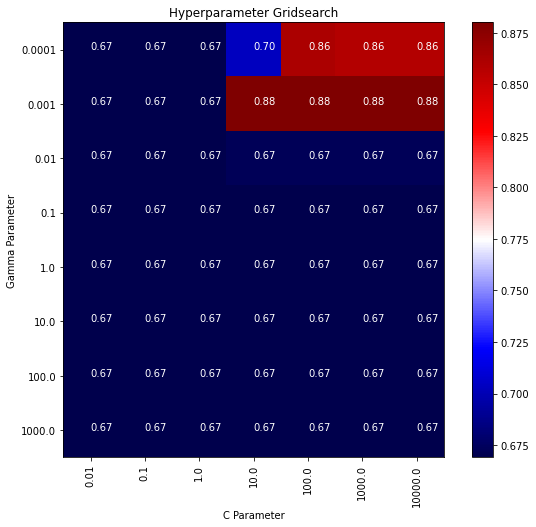

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
hm = plt.imshow(all_parameters , cmap = 'seismic' , interpolation = 'nearest' )
for a in range(len([0, 1, 2, 3, 4, 5, 6, 7])):
    for b in range(len([0, 1, 2, 3, 4, 5, 6])):
        plt.text(b, a, format(all_parameters[a][b], '.2f'), color="w")
plt.xticks([0, 1, 2, 3, 4, 5, 6], [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0], rotation = 'vertical') 
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7], [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], rotation = 'horizontal')
plt.xlabel('C Parameter')
plt.ylabel('Gamma Parameter')
plt.title('Hyperparameter Gridsearch')
plt.colorbar(hm)

## Question 4
Train your SVM model by the best parameters you found from question 2 on the whole training set and evaluate the performance on the test set.

## find the best parameters from the whole dataset

In [14]:
best_score = 0
all_parameters = []
best_gamma = 0
best_C = 0
for gamma in [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]:
    for C in [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]:
        svm = SVC(gamma = gamma, kernel = 'rbf', C = C)
        svm.fit(x_train, y_train)
        score = svm.score(x_test, y_test)
        all_parameters.append(score)
        if score > best_score:
            best_score = score
            best_gamma = gamma
            best_C = C
            best_parameters = {'gamma' : best_gamma, 'C' : best_C}
            
best_model = SVC(C = best_C, kernel = 'rbf', gamma = best_gamma)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print("Accuracy score: ", accuracy_score(y_pred, y_test))

Accuracy score:  0.90625


## using the parameters found from question 2

In [15]:
best_model = SVC(C = 10.0, kernel = 'rbf', gamma = 0.001)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print("Accuracy score: ", accuracy_score(y_pred, y_test))

Accuracy score:  0.8958333333333334
